In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

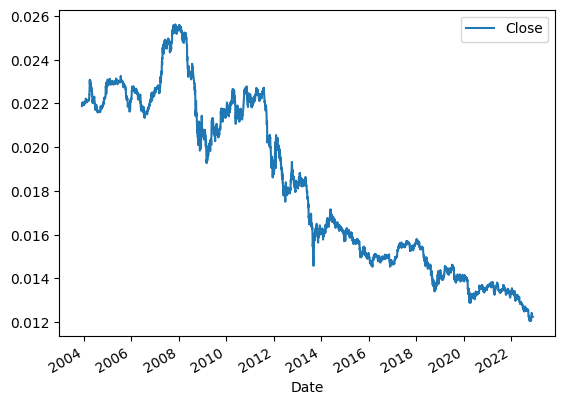

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  926
Model:             ExponentialSmoothing   SSE                              0.000
Optimized:                         True   AIC                         -17615.831
Trend:                         Additive   BIC                         -17538.537
Seasonal:                Multiplicative   AICC                        -17615.077
Seasonal Periods:                    12   Date:                 Wed, 06 Dec 2023
Box-Cox:                          False   Time:                         14:48:00
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828571                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
#read the data file. the date column is expected to be in the mm-dd-yyyy format.
df = pd.read_csv(r"in.csv",parse_dates=True,index_col=0) #insert your data here
#plot the data
df.plot()
plt.show()
#split between the training and the test data sets. The last 12 periods form the test data
df_train = df.iloc[:-4000]
df_test = df.iloc[-4000:]
#build and train the model on the training data
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit(optimized=True, use_brute=True)
#print out the training summary
print(fitted.summary())
#create an out of sample forcast for the next 12 steps beyond the final data point in the training data set
sales_forecast2= fitted.forecast(steps=12)
plt.show()

In [5]:
sales_forecast2


926    0.024692
927    0.024718
928    0.024730
929    0.024752
930    0.024776
931    0.024773
932    0.024804
933    0.024818
934    0.024814
935    0.024821
936    0.024820
937    0.024846
dtype: float64

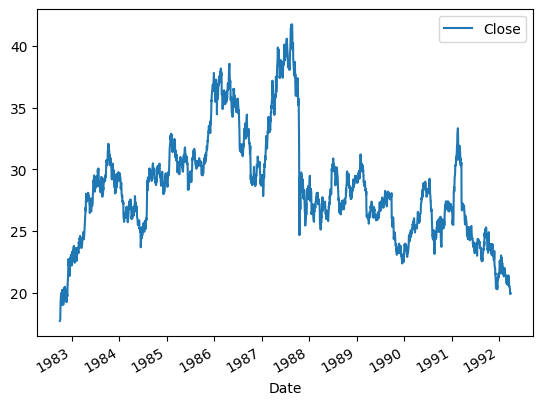

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


IndexError: ignored

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
#read the data file. the date column is expected to be in the mm-dd-yyyy format.
df = pd.read_csv(r"ibm.csv",parse_dates=True,index_col=0) #insert your data here
#plot the data
df.plot()
plt.show()
#split between the training and the test data sets. The last 12 periods form the test data
df_train = df.iloc[:-4000]
df_test = df.iloc[-4000:]
#build and train the model on the training data
model = HWES(df_train, seasonal_periods=12)
fitted = model.fit(optimized=True, use_brute=True)
#print out the training summary
print(fitted.summary())
#create an out of sample forcast for the next 12 steps beyond the final data point in the training data set
sales_forecast2= fitted.forecast(steps=12)
plt.show()

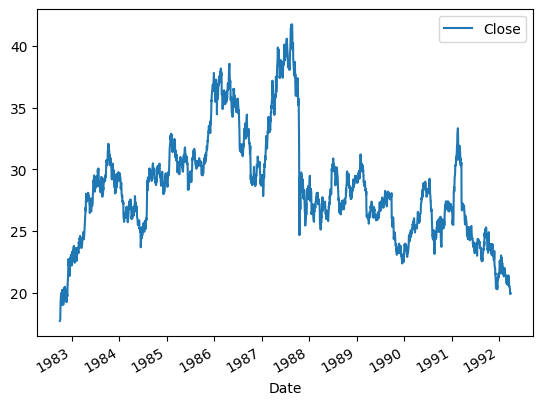

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 2002
Model:             ExponentialSmoothing   SSE                            364.761
Optimized:                         True   AIC                          -3400.724
Trend:                         Additive   BIC                          -3378.317
Seasonal:                          None   AICC                         -3400.682
Seasonal Periods:                  None   Date:                 Wed, 06 Dec 2023
Box-Cox:                          False   Time:                         14:57:12
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9525192                alpha                 True
smoothing_trend             0.0000

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
#read the data file. the date column is expected to be in the mm-dd-yyyy format.
df = pd.read_csv(r"ibm.csv",parse_dates=True,index_col=0) #insert your data here
#plot the data
df.plot()
plt.show()
#split between the training and the test data sets. The last 12 periods form the test data
df_train = df.iloc[:-400]
df_test = df.iloc[-400:]
#build and train the model on the training data
model = HWES(df_train, seasonal_periods=12,trend='add')
fitted = model.fit(optimized=True, use_brute=True)
#print out the training summary
print(fitted.summary())
#create an out of sample forcast for the next 12 steps beyond the final data point in the training data set
sales_forecast1 = fitted.forecast(steps=400)
plt.show()

In [16]:
sales_forecast1

2002    24.346304
2003    24.349614
2004    24.352924
2005    24.356235
2006    24.359545
          ...    
2397    25.653867
2398    25.657177
2399    25.660487
2400    25.663798
2401    25.667108
Length: 400, dtype: float64

In [17]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_test, sales_forecast1)

In [18]:
mae

2.4681055261367737

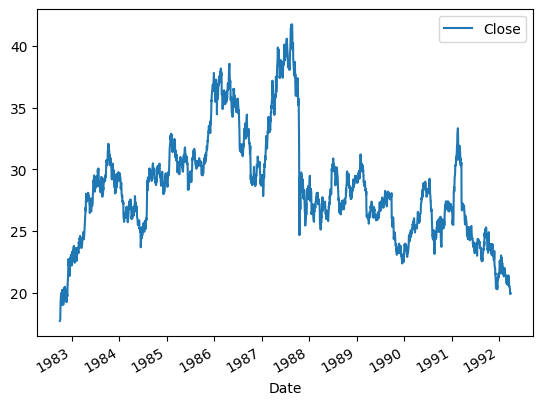

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 2002
Model:             ExponentialSmoothing   SSE                            364.785
Optimized:                         True   AIC                          -3400.594
Trend:                   Multiplicative   BIC                          -3378.187
Seasonal:                          None   AICC                         -3400.552
Seasonal Periods:                  None   Date:                 Wed, 06 Dec 2023
Box-Cox:                          False   Time:                         14:57:57
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9526085                alpha                 True
smoothing_trend            1.099e-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
#read the data file. the date column is expected to be in the mm-dd-yyyy format.
df = pd.read_csv(r"ibm.csv",parse_dates=True,index_col=0) #insert your data here
#plot the data
df.plot()
plt.show()
#split between the training and the test data sets. The last 12 periods form the test data
df_train = df.iloc[:-400]
df_test = df.iloc[-400:]
#build and train the model on the training data
model = HWES(df_train, seasonal_periods=12,trend='mul')
fitted = model.fit(optimized=True, use_brute=True)
#print out the training summary
print(fitted.summary())
#create an out of sample forcast for the next 12 steps beyond the final data point in the training data set
sales_forecast1 = fitted.forecast(steps=400)
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_test, sales_forecast1)

In [21]:
mae

2.1056868572475116